In [13]:
#data preprocessing
import pandas as pd
import time
from datetime import datetime
from collections import OrderedDict
import os
import numpy as np

path = "./"
names = ['Timestamp', 'AF3 Value', 'AF3 Quality', 'AF4 Value', 'AF4 Quality', 'F3 Value', 'F3 Quality', 'F4 Value', 'F4 Quality', 'F7 Value', 'F7 Quality', 'F8 Value', 'F8 Quality', 'Label']
trials_data = OrderedDict((el, []) for el in names)
# loop through files in the current dir
for file in sorted(os.listdir(path)):
    if '.csv' in file:
        df = pd.read_csv(path+file)
        l = len(df)

        start_time = time.mktime(datetime.strptime(df['Timestamp'][0], "%Y-%m-%d %H:%M:%S.%f").timetuple())
        end_time = time.mktime(datetime.strptime(df['Timestamp'][l-1], "%Y-%m-%d %H:%M:%S.%f").timetuple())

        timestamps = []
        timestamps.append([start_time+10, False])

        t_next = timestamps[len(timestamps)-1][0]+8
        t_next_next = timestamps[len(timestamps)-1][0]+13

        while t_next_next < end_time:
            timestamps.append([t_next, True])
            timestamps.append([t_next_next, False])
            t_next = timestamps[len(timestamps)-1][0]+8
            t_next_next = timestamps[len(timestamps)-1][0]+13

        if t_next < end_time:
            timestamps.append([t_next, True])
            timestamps.append([end_time, False])
        else:
            timestamps.append([end_time, True])

        timestamp_iter = 0
        label_iter = 0

        for item, row in df.iterrows():
            if len(row['Timestamp']) == 26:
                timestamp = time.mktime(datetime.strptime(row['Timestamp'], "%Y-%m-%d %H:%M:%S.%f").timetuple())
            else:
                timestamp = time.mktime(datetime.strptime(row['Timestamp'], "%Y-%m-%d %H:%M:%S").timetuple())

            if timestamp <= timestamps[timestamp_iter][0]:
                if timestamps[timestamp_iter][1]:
                    # now save your stuff
                    for key in trials_data.keys():
                        if 'Label' not in key:
                            trials_data[key].append(row[key])
                    if label_iter % 2 == 0:
                        trials_data['Label'].append('R')
                    else:
                        trials_data['Label'].append('L')

            else:
                # we only get here if we pass from one interval to the next
                timestamp_iter += 1
                if timestamps[timestamp_iter][1]:
                    label_iter += 1
                    for key in trials_data.keys():
                        if 'Label' not in key:
                            trials_data[key].append(row[key])
                    if label_iter % 2 == 0:
                        trials_data['Label'].append('R')
                    else:
                        trials_data['Label'].append('L')




2016-12-18 17:59:42.006000
6803
7459
-5300
11
-6869
633
4137
1676
7429
2688
-6173
503
2016-12-18 17:59:42.007000
-2605
7459
-5641
11
3109
633
-4177
1676
4224
2688
-4638
503
2016-12-18 17:59:42.016000
-7071
7459
-4965
11
7752
10843
5072
1676
2006
2688
-791
503
2016-12-18 17:59:42.019000
-1389
7459
6182
11
-56
10843
2554
1676
827
2688
-2929
8519
2016-12-18 17:59:42.023000
7955
7459
1750
11
4419
10843
506
1676
5382
2688
-6458
8519
2016-12-18 17:59:42.032000
5724
7459
-2381
11
-5492
10843
8000
1676
-6131
2688
-7443
8519
2016-12-18 17:59:42.033000
-4142
7459
4571
11
-5586
10843
-7379
1676
-7267
2688
-334
8519
2016-12-18 17:59:42.038000
5603
7459
-2700
11
-1333
10843
-506
1676
7459
2688
2539
8519
2016-12-18 17:59:42.047000
2718
7459
5295
11
-3087
10843
-2124
1676
-1112
2688
-720
8519
2016-12-18 17:59:42.050000
-4054
7459
-1919
11
5821
10843
6369
1676
-7369
2688
3759
8519
2016-12-18 17:59:42.054000
-6431
7459
4980
11
-1039
10843
-491
1676
-3141
2688
-6386
8519
2016-12-18 17:59:42.063000
6192


KeyboardInterrupt: 

In [ ]:
# stimulus for EEG recording
import pygame
import sys
import time
from pygame.locals import *

pygame.init()

# setup the visualization parameters
WIDTH = 1680
HEIGHT = 1050
win = pygame.display.set_mode((WIDTH, HEIGHT), 0, 32)
black = (0, 0, 0)
white = (255, 255, 255)
clock = pygame.time.Clock()

# preparation time
win.fill(black)
time.sleep(10)

# experiment time
mins = 5
to_sec = 60

def main():

    t_end = time.time() + mins*to_sec
    while time.time() < t_end:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                sys.exit()
        # epochs 
        pygame.draw.rect(win, white, (0, 0, WIDTH/2, HEIGHT))
        pygame.display.update()
        time.sleep(8)
        win.fill(black)
        pygame.display.update()
        time.sleep(5)
        pygame.draw.rect(win, white, (WIDTH/2, 0, WIDTH/2, HEIGHT))
        pygame.display.update()
        time.sleep(8)
        win.fill(black)
        pygame.display.update()
        time.sleep(5)
        clock.tick(60)

main()

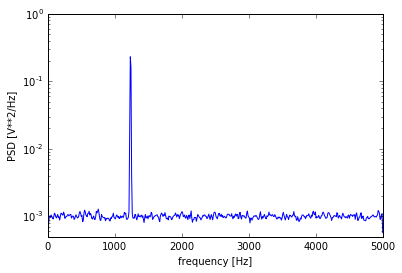

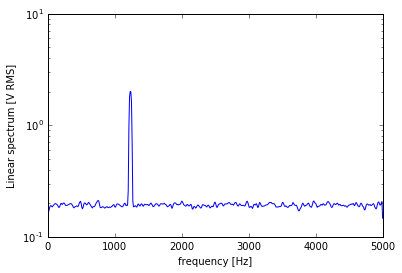

In [15]:
# reduce dimensionality of each trial by using 2 features for each electrode
# we will look at power and kurtosis analysis of EEG signal


# The first feature is the power: estimate and plot the power spectral density using Welch’s method:
# SAMPLE APPLICATION (adapt for your use)
from scipy import signal
import matplotlib.pyplot as plt
#Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by 0.001 V**2/Hz of white noise sampled at 10 kHz.

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

#Compute and plot the power spectral density.

f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# If we average the last half of the spectral density, to exclude the peak, we can recover the noise power on the signal.
np.mean(Pxx_den[256:])
# Now compute and plot the power spectrum.
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()


In [21]:
# The second feature is the kurtosis: Computing the kurtosis Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). 
# SAMPLE APPLICATION (adapt for your use)
import pandas as pd
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore'])
df['preTestScore'].kurt()


-2.4673543738411547

In [ ]:
# classification of our trials data using the 2 features for each of the 6 electrodes
# SAMPLE APPLICATION (adapt for your use)
"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()